In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps

from scipy.signal import find_peaks
from scipy import signal
from scipy.optimize import curve_fit

import tifffile as tf

In [2]:
first_images = tf.imread(r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-25 15.09.09 vid long 200fps\Allied Vision Technologies GS650 0001f61c\1336835.tif")

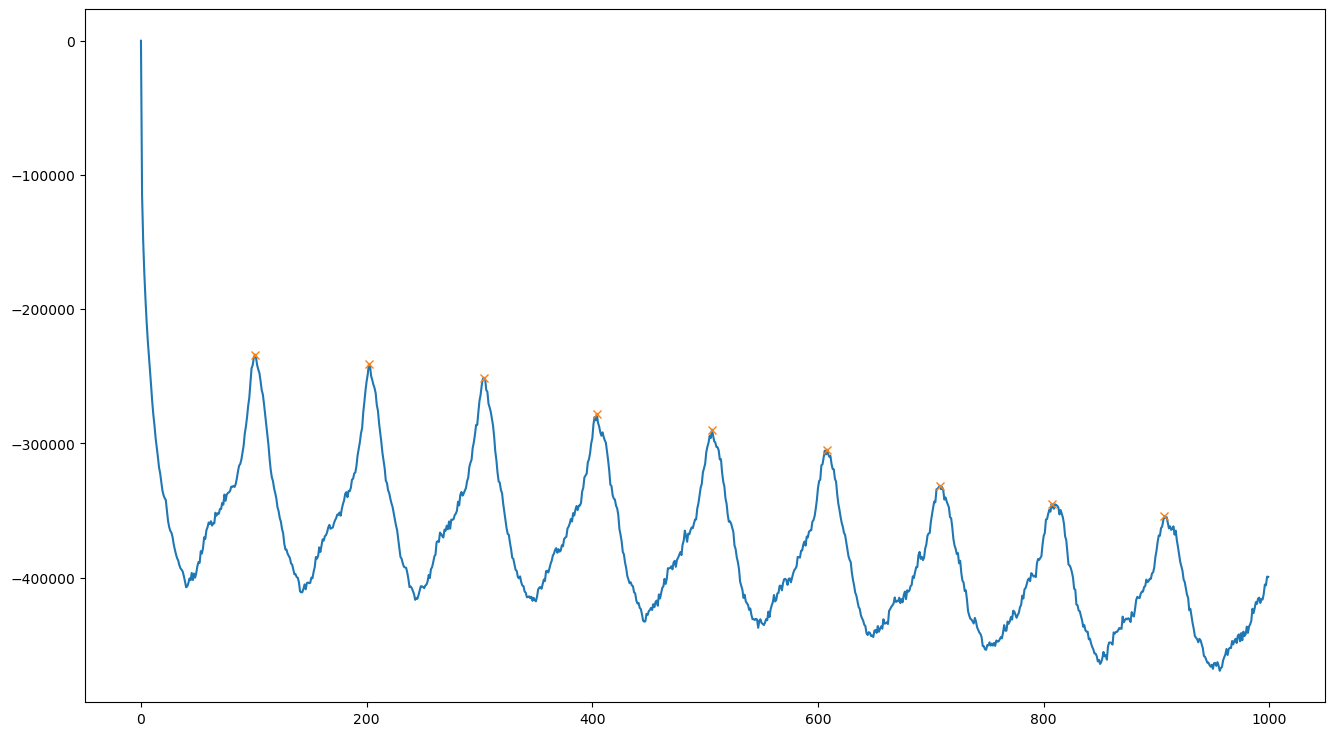

[101 102 100 102 102 100  99 100]


In [7]:
sad = -jps.sad_with_references(first_images[0], first_images)

plt.figure(figsize = (16,9))
plt.plot(sad)
# find peaks
peaks, _ = find_peaks(sad, prominence=0.1, width=10)
# Plot peaks
plt.plot(peaks, sad[peaks], "x")
plt.show()

print(np.diff(peaks))

Setting source to E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-25 15.09.09 vid long 200fps\Allied Vision Technologies GS650 0001f61c\*tif
Getting reference sequence
Reference period: 101.45598932083799; Reference indices: [20, 126]
Getting SADs
Getting phases


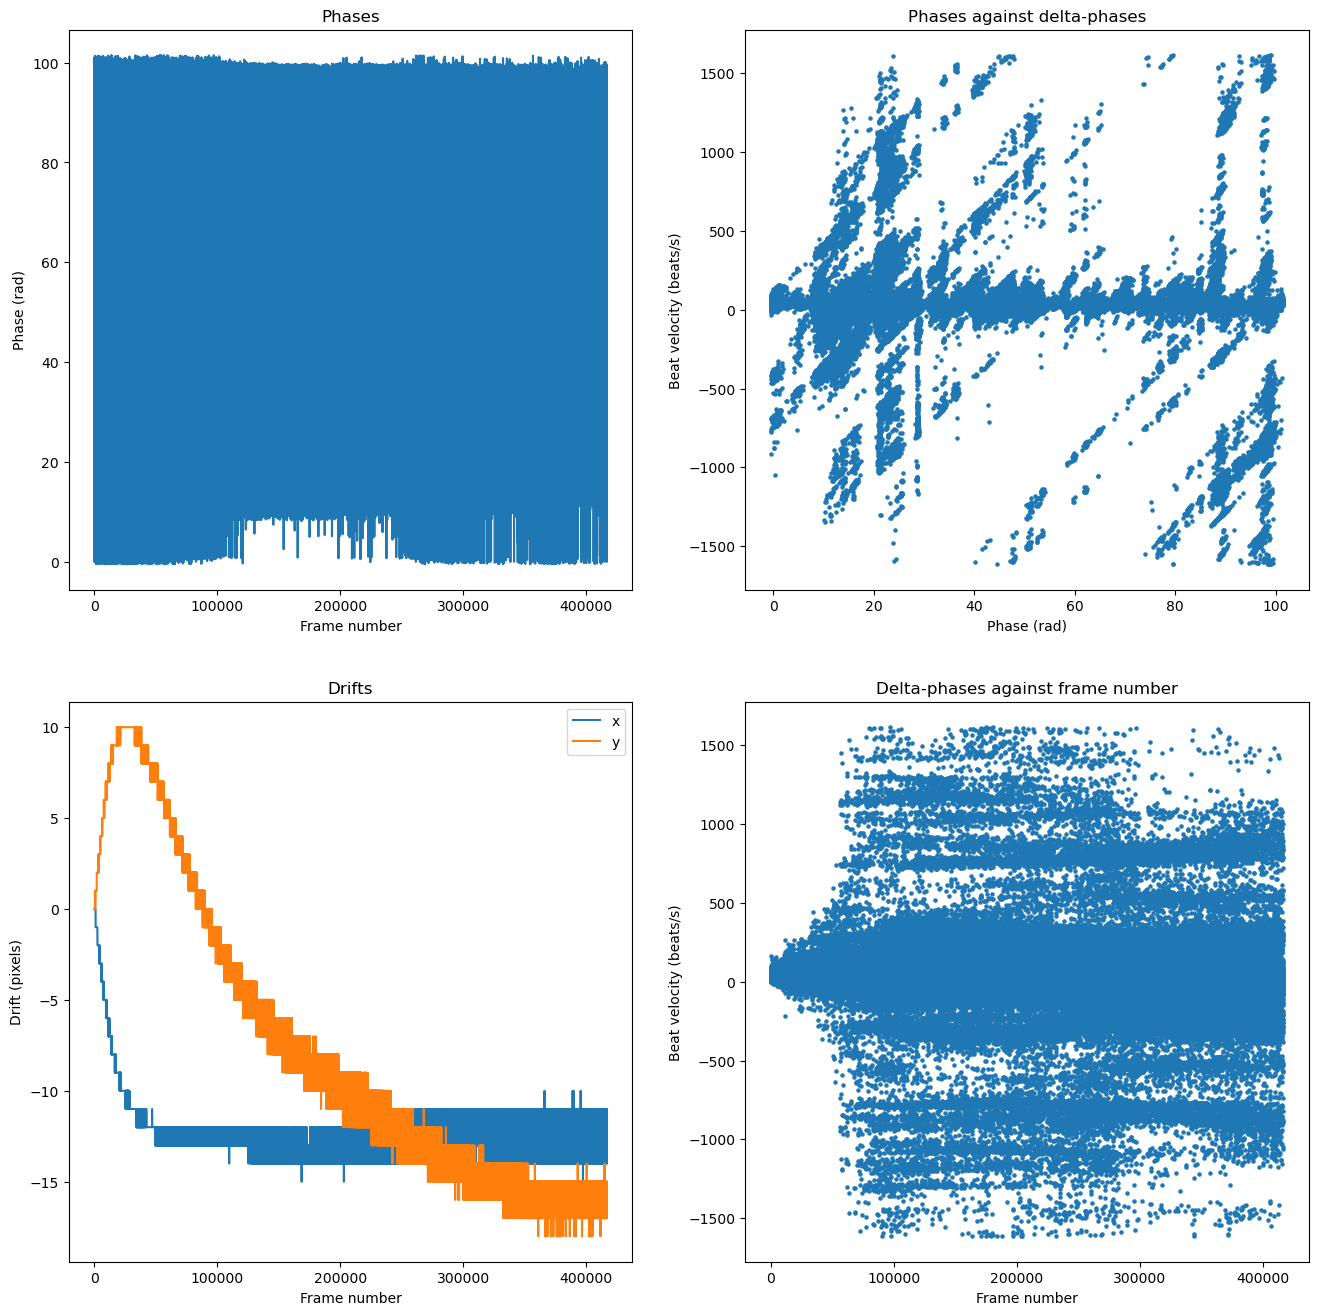

In [8]:
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-25 15.09.09 vid long 200fps\Allied Vision Technologies GS650 0001f61c\*tif")
oog.sequence_manager.frame_rate = 200
oog.settings["pi_space"] = False
oog.run()

oog.plot_summary()o

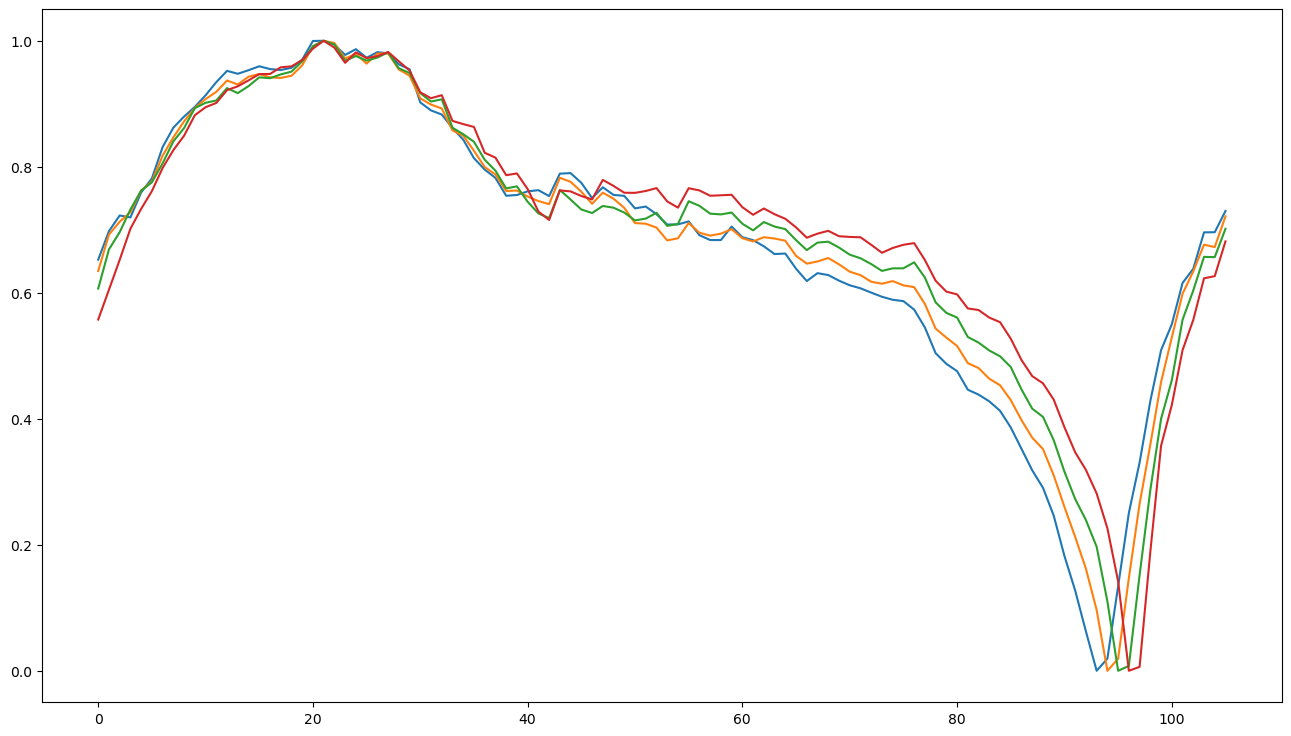

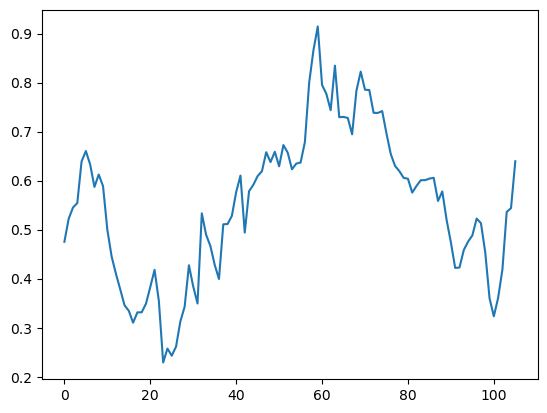

In [9]:
sads = []
for sad in oog.sads:
    sad = sad - np.min(sad)
    sad = sad / np.max(sad)
    sads.append(sad)

sads = np.array(sads)

plt.figure(figsize = (16,9))
for i in range(4):
    plt.plot(sads[i+214])
plt.show()

plt.plot(np.mean(sads, axis = 0))
plt.show()

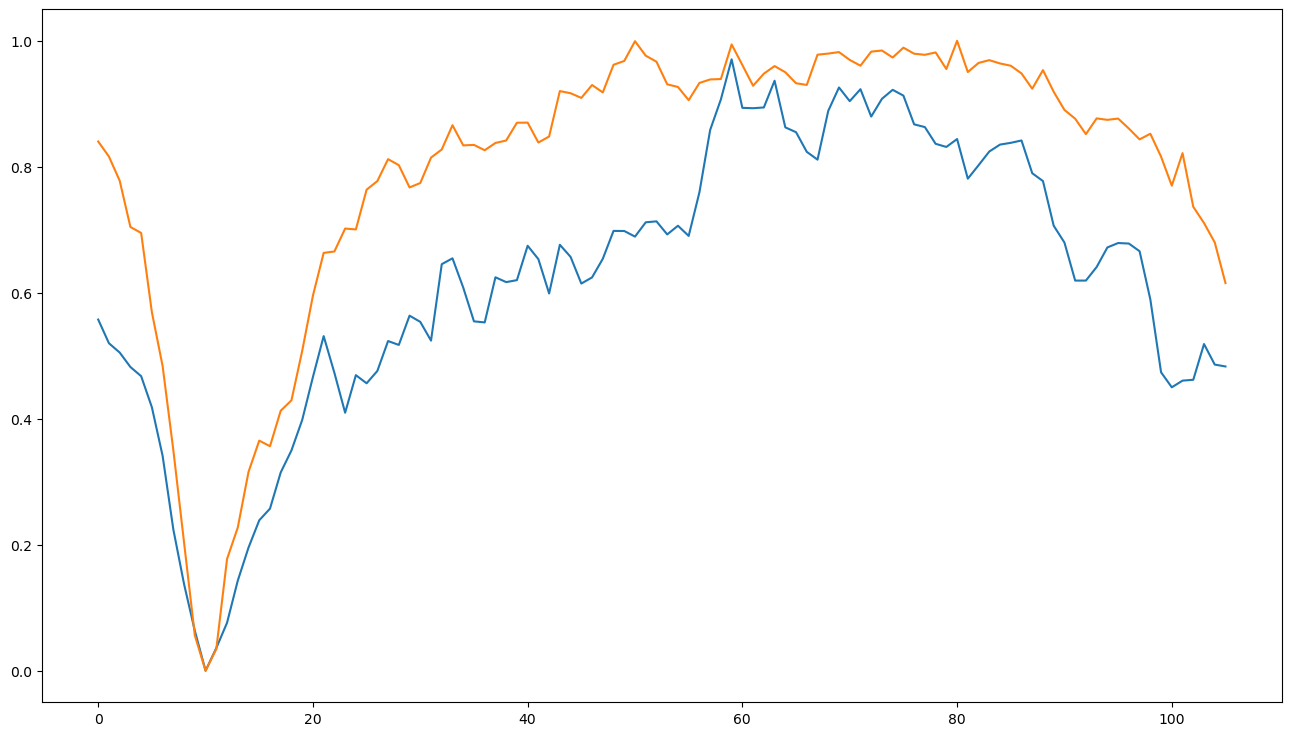

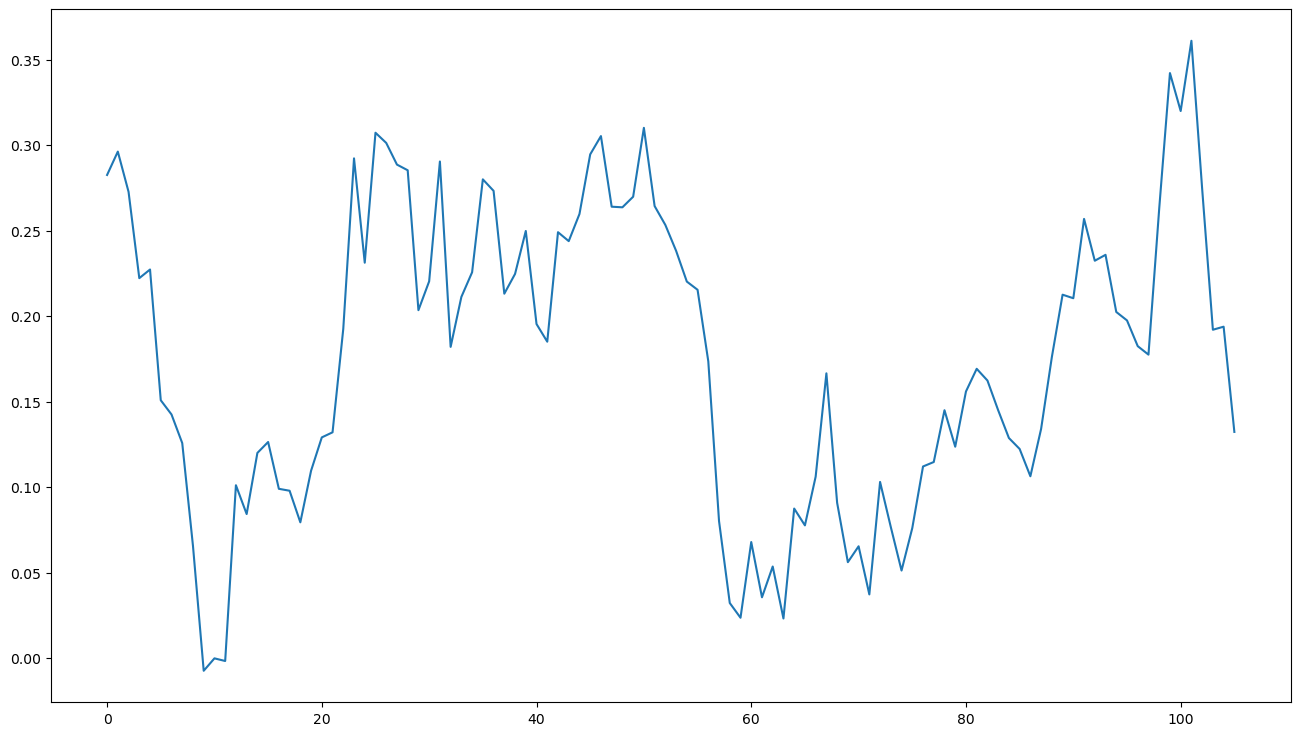

In [10]:
minima = 10
plt.figure(figsize = (16,9))
plt.plot(np.mean(sads[np.where(oog.frame_minimas == minima)[0]], axis = 0))
plt.plot(sads[np.where(oog.frame_minimas == minima)[0][5]])
plt.show()

plt.figure(figsize = (16,9))
plt.plot(sads[np.where(oog.frame_minimas == minima)[0][5]] - np.mean(sads[np.where(oog.frame_minimas == minima)[0]], axis = 0))
plt.show()

